# Introduction

Support Vector Machines is another suprevised learning algorithm which can be used for both classification and regression. It tries to define a hyperplane (or set of hyperplanes) in high dimensional plane used to classify the data or regression. Margin is defined as the sum of the minimum perpendicular distances to the hyperplane for each class. The maximum margin hyperplane is defined as the one which maximizes this margin. We discuss the basic definition fo hyperplane and the usecase for binary classificaiton.

A hyperplane can be defined as:
$$\vec{w}.\vec{x} - b = 0$$
where $w$ is a normal vector (not necessarily normalized), $x$ is any point on the hyperplane and $\frac{b}{\|\vec{w}\|}$ is the offset of the hyperplane from origin. The dimension of the plane is dimension of the normal vector. Clssification using this hyperplane can be done by measuring the perpendicular distance and checking which side the point lies on. With proper data scaling, we can define the boundaries for both classes. For positive class,
$$\vec{w}\cdot\vec{x_i} - b \geq 1$$
and for negative class
$$\vec{w}\cdot\vec{x_i} - b \leq -1$$
This can be combined to one equation using a little trick:
$$y_i(\vec{w}\cdot\vec{x_i} - b) \geq 1$$
Specifically, the points which lie on the boundaries are called Support points. These are the critical points which determine the location of the hyperplane (more on this later).
The prediction function then becomes the signum function:
$$\hat{y} = sign{(\vec{w}\cdot\vec{x} - b)}$$
The margin between the two separating hyperplanes is $\frac{2}{\|\vec{w}\|}$. To maximize the margin we need to minimize the $\|\vec{w}\|$ (Subject to the condition defined above for classifying the samples well).

#### Soft Margin

In case the samples are not linearly classifiable, we can also tweak the optimization to get a soft margin which allows some samples to be either inside the margin or on the wrong side of the hyperplane. Also, this is useful to avoid overfitting the training samples as well. For these cases, a hinge loss function is defined:
$$max(0, 1 - y_i(\vec{w}\cdot\vec{x_i} - b))$$
For samples satisfying the margin, the loss function is $0$ and for others, it is proportional to the distance from the margin. In this case, the function we want to reduce becomes:
$$\frac{1}{n}\sum_{i=1}^{n}max(0, 1 - y_i(\vec{w}\cdot\vec{x_i} - b)) + \lambda \|\vec{w}\|^2$$
where $\lambda$ is a tuning parameter which determines the tradeoff between increasing the margin size and correctly classifying the samples.

#### Kernels in SVM

Kernels are used to generate non-linear hyperplanes which can leverage the same mathematics due to a very important feature discussed below, namely the dependence of the optimization function on only the dot product of the samples.
Taking a step back, the original optimization problem is to minimize $L = \frac{1}{2}\|\vec{w}\|^2$ such that $y_i(\vec{w}\cdot\vec{x_i} - b) -1 = 0$. Using Lagrangian multipliers $\alpha_i's$,
$$L = \frac{1}{2}\|\vec{w}\|^2 - \sum \alpha_i[y_i(\vec{w}\cdot\vec{x_i} - b) -1]$$
On differentiating wrt $\vec{w}$ & $b$ and equating to zero,
$$\vec{w} = \sum \alpha_iy_i\vec{x_i}, \sum \alpha_iy_i = 0$$
On substituting the findings back to the objective cost function,
$$L = \max_{\alpha}\Big[\sum \alpha_i - \frac{1}{2}\sum_{i,j} \alpha_i\alpha_jy_iy_j\vec{x_i}\cdot\vec{x_j}\Big]$$
subject to the conditions:
$$\vec{w} = \sum \alpha_iy_i\vec{x_i}, \sum \alpha_iy_i = 0, \alpha_i \geq 0$$
Now, if we define some kernel function $K(\vec{x_i}, \vec{x_j}) = \phi(x_i)\cdot\phi(x_j)$, then we don't need to explicitly know the $\phi_i's$ since the optimization function only depends on the dot product of the samples. There can be many types of kernels which can be used:
1. Polynomial Function -> $K(\vec{x}, \vec{y}) = (\vec{x}\cdot\vec{y} + 1)^p$
2. Radial Basis Function -> $K(\vec{x}, \vec{y}) = e^{\frac{1}{2\sigma^2}\|\vec{x} - \vec{y}\|^2}$

Using some mathematics it can be shown that $\alpha_i's$ are non-zero for just the support points (and hence the name Support Vector Machine).

#### Optimization

The optimization can be done using some quadratic solver. Or we could use stochastic gradient descent as well. For that, we need to find the gradient of the cost function so that we can update the weights accordingly. This can be done as follows (refer <a href="http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf">here</a>):
![SGD for SVM optimization](svm1.png)
![SGD for SVM optimization](svm2.png)

# Support Vector Machines in python 

So its clear that we can use SGD only for the non-kernel cases. Otherwise we need to sovle the optimization using quadratic solver. This is not actually true because we can also convert the SGD cost function to use kernel transformations as described <a href="https://stats.stackexchange.com/questions/215524/is-gradient-descent-possible-for-kernelized-svms-if-so-why-do-people-use-quadr">here.</a> Anyway, for now we try to use the hinge loss function to approximate the SVM classifier coefficients. For the gradient descent algorithm, we'll reuse the 'GradientDescent' class defined previously <a href="https://github.com/soumyasanyal/machinelearning/blob/master/Regression/GradientDescent.py">here</a>. For sample generation, we create clusters of data with some variance.



Gradient descent hingeloss: stochastic with no adaptive learning


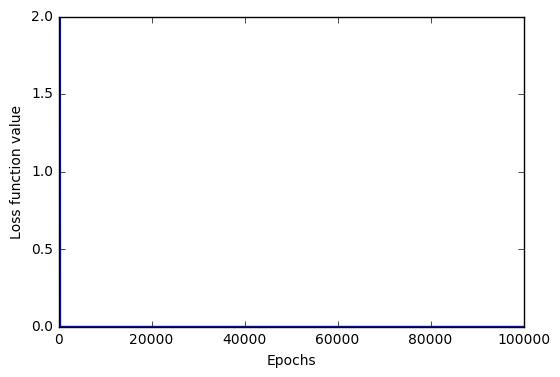

Optimized Coefficients: [[ 0.47740003]
 [ 0.80023202]
 [-0.62325478]]
Plot training data with classifier:


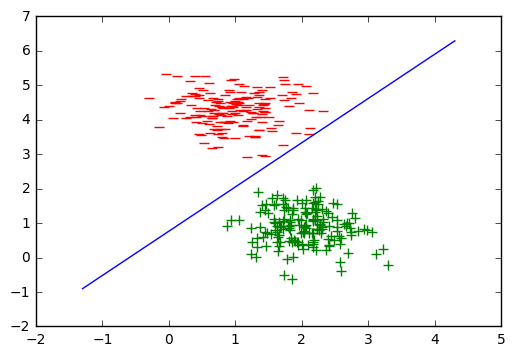

Plot test data with classifier with actual labels:


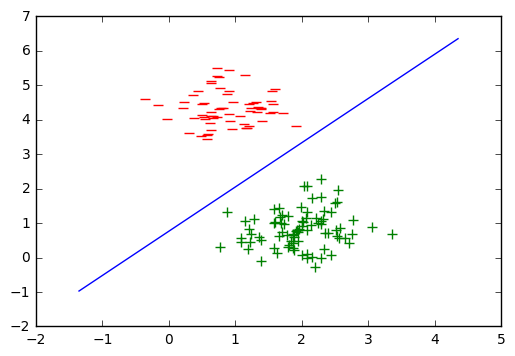

Plot training data with classifier with predicted labels(similarity with previous plot implies good algorithm)


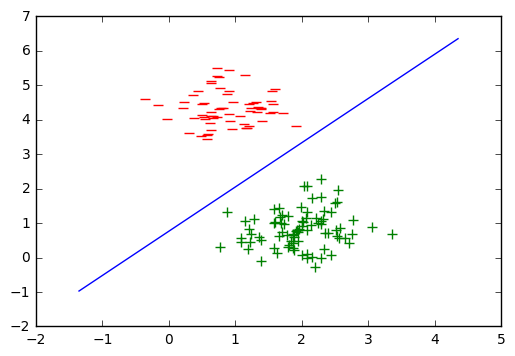

In [109]:
import GradientDescent as GrD
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
import importlib

def randomSampleGenerator(n):
    X, Y = make_blobs(n_samples=n, centers=2,
                      random_state=0, cluster_std=0.5)
    X = np.insert(X, 0, 1, axis=1)
    Y = np.sign(Y - 0.5)
    return [X, np.array(Y).reshape(-1,1)]

#Given X, Y and predicted coeff, try to plot the graph of the same
def plotSVM(X, Y, coeff):
    color=['red','green','blue']
    for idx, sample in enumerate(X):
        if Y[idx] == -1:
            plt.scatter(sample[1], sample[2], marker='_', c='r', s=50, cmap='autumn')
        elif Y[idx] == 1:
            plt.scatter(sample[1], sample[2], marker='+', c='g', s=50, cmap='autumn')
        else:
            print('Error value predicted!!!')
    line = lambda x: -coeff[0]/coeff[2] - coeff[1]/coeff[2]*x
    minX1 = X.min(0)[1]
    maxX1 = X.max(0)[1]
    plt.plot([minX1-1, maxX1+1], [line(minX1-1)[0], line(maxX1+1)[0]])
    plt.show()

if __name__ == "__main__":
    # This is required so that the changes are picked up properly by the Jupyter notebook
    importlib.reload(GrD)

    N_samples = 500
    [X, Y] = randomSampleGenerator(N_samples)
    [X_train, Y_train ] = [X[0:int(0.7*N_samples),:], Y[0:int(0.7*N_samples)]]
    [X_test, Y_test ] = [X[int(0.7*N_samples):N_samples,:], Y[int(0.7*N_samples):N_samples]]

    learningRate = 0.1
    GD = GrD.GradientDescent(method="stochastic", loss="hingeloss", lr=learningRate,
                             lambdaVal = 1.0/learningRate, epochs=100000)
    print('\n\nGradient descent hingeloss: stochastic with no adaptive learning')
    coeff = GD.fit(X_train, Y_train)
    print('Optimized Coefficients:', coeff)
    YPredict = GD.predict(X_test)
    print('Plot training data with classifier:')
    plotSVM(X_train, Y_train, coeff)
    print('Plot test data with classifier with actual labels:')
    plotSVM(X_test, Y_test, coeff)
    print('Plot training data with classifier with predicted labels(similarity with previous plot '+
             'implies good algorithm)')
    plotSVM(X_test, YPredict, coeff)